## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Thu Feb  4 05:36:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
import os
import keras
import numpy as np
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [38]:
train, test = keras.datasets.cifar10.load_data()

In [39]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = (x-np.mean(x))/(np.max(x)-np.min(x))
    if flatten:
      x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_class = 10):
    if y.shape[-1] == 1:
      y = keras.utils.to_categorical(y, num_class)
    return y

In [40]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
"""Code Here
建立你的神經網路
"""
model = Sequential()
model.add(Dense(input_dim = x_train.shape[1], units=512, activation='relu'))
for i in range(8):
  model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# def build_mlp():
#     pass

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_20 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)               

In [43]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [44]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [45]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 6ms/step - loss: 1.9428 - accuracy: 0.2912 - val_loss: 1.5713 - val_accuracy: 0.4403
Epoch 2/100
196/196 [==============================] - 1s 5ms/step - loss: 1.5525 - accuracy: 0.4465 - val_loss: 1.4956 - val_accuracy: 0.4699
Epoch 3/100
196/196 [==============================] - 1s 5ms/step - loss: 1.4186 - accuracy: 0.4977 - val_loss: 1.4369 - val_accuracy: 0.4891
Epoch 4/100
196/196 [==============================] - 1s 5ms/step - loss: 1.3139 - accuracy: 0.5356 - val_loss: 1.3974 - val_accuracy: 0.5103
Epoch 5/100
196/196 [==============================] - 1s 5ms/step - loss: 1.2469 - accuracy: 0.5604 - val_loss: 1.4149 - val_accuracy: 0.5030
Epoch 6/100
196/196 [==============================] - 1s 5ms/step - loss: 1.1724 - accuracy: 0.5853 - val_loss: 1.4035 - val_accuracy: 0.5074
Epoch 7/100
196/196 [==============================] - 1s 5ms/step - loss: 1.1075 - accuracy: 0.6088 - val_loss: 1.4086 - val_accuracy: 0.5086

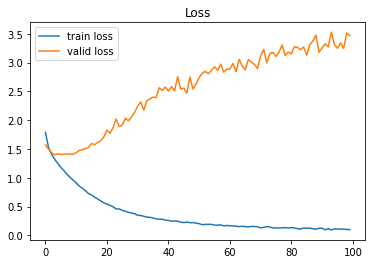

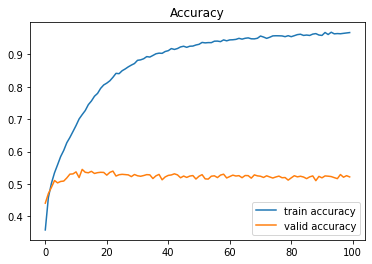

In [46]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()